In [2]:
from joblib import load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

### Load pandas files

In [3]:
# Load data frames
dftrain = pd.read_csv('./Final_Results/INITIAL_SPLIT/train_fullbrain.csv', index_col=0)
dftrain_corr = pd.read_csv('./Final_Results/CORR_ANA/fullbrain_corr.csv', index_col=0)
dftrain_corr_l = pd.read_csv('./Final_Results/CORR_ANA/leftbrain_corr.csv', index_col=0)
dftrain_corr_r = pd.read_csv('./Final_Results/CORR_ANA/rightbrain_corr.csv', index_col=0)

In [3]:
# Load rfe objects (RF)
rfetrain_rf = load('./Final_Results/FS/Normalize_allMorphFeats/rfetrain_rf.joblib')
rfetrain_corr_rf = load('./Final_Results/FS/Normalize_allMorphFeats/rfetrain_corr_rf.joblib')
rfetrain_corr_l_rf = load('./Final_Results/FS/Normalize_allMorphFeats/rfetrain_corr_l_rf.joblib')
rfetrain_corr_r_rf = load('./Final_Results\\FS\\Normalize_allMorphFeats\\rfetrain_corr_r_rf.joblib')

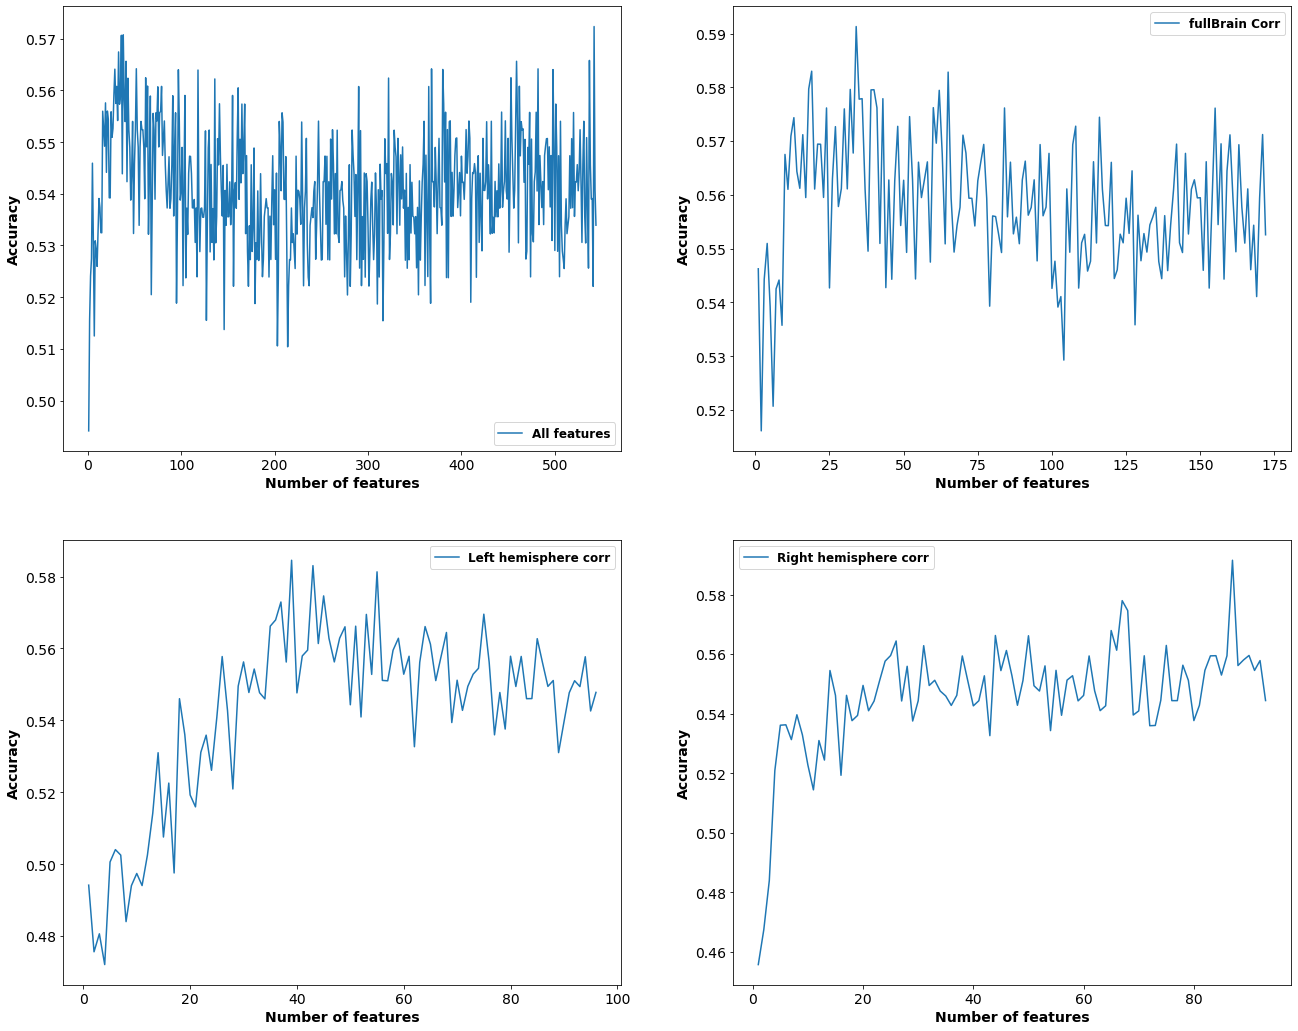

In [4]:
f1 = plt.figure(1, figsize=(22,18))
plt.subplot(2,2,1)
plt.plot(range(1,len(rfetrain_rf.grid_scores_)+1), rfetrain_rf.grid_scores_, label='All features')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of features', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Accuracy', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})


plt.subplot(2,2,2)
plt.plot(range(1,len(rfetrain_corr_rf.grid_scores_)+1), rfetrain_corr_rf.grid_scores_, label='fullBrain Corr')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of features', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Accuracy', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})

plt.subplot(2,2,3)
plt.plot(range(1,len(rfetrain_corr_l_rf.grid_scores_)+1), rfetrain_corr_l_rf.grid_scores_, label='Left hemisphere corr')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of features', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Accuracy', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})

plt.subplot(2,2,4)
plt.plot(range(1,len(rfetrain_corr_r_rf.grid_scores_)+1), rfetrain_corr_r_rf.grid_scores_, label='Right hemisphere corr')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of features', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Accuracy', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})
plt.show()

In [5]:
def get_feature_names_by_importance(df, rfeobj):
    selected_cols_names = df.columns[np.where(rfeobj.support_)]
    selected_feats_sorted_by_importance = selected_cols_names[np.argsort(rfeobj.estimator_.feature_importances_)]
    return selected_feats_sorted_by_importance, np.sort(rfeobj.estimator_.feature_importances_)

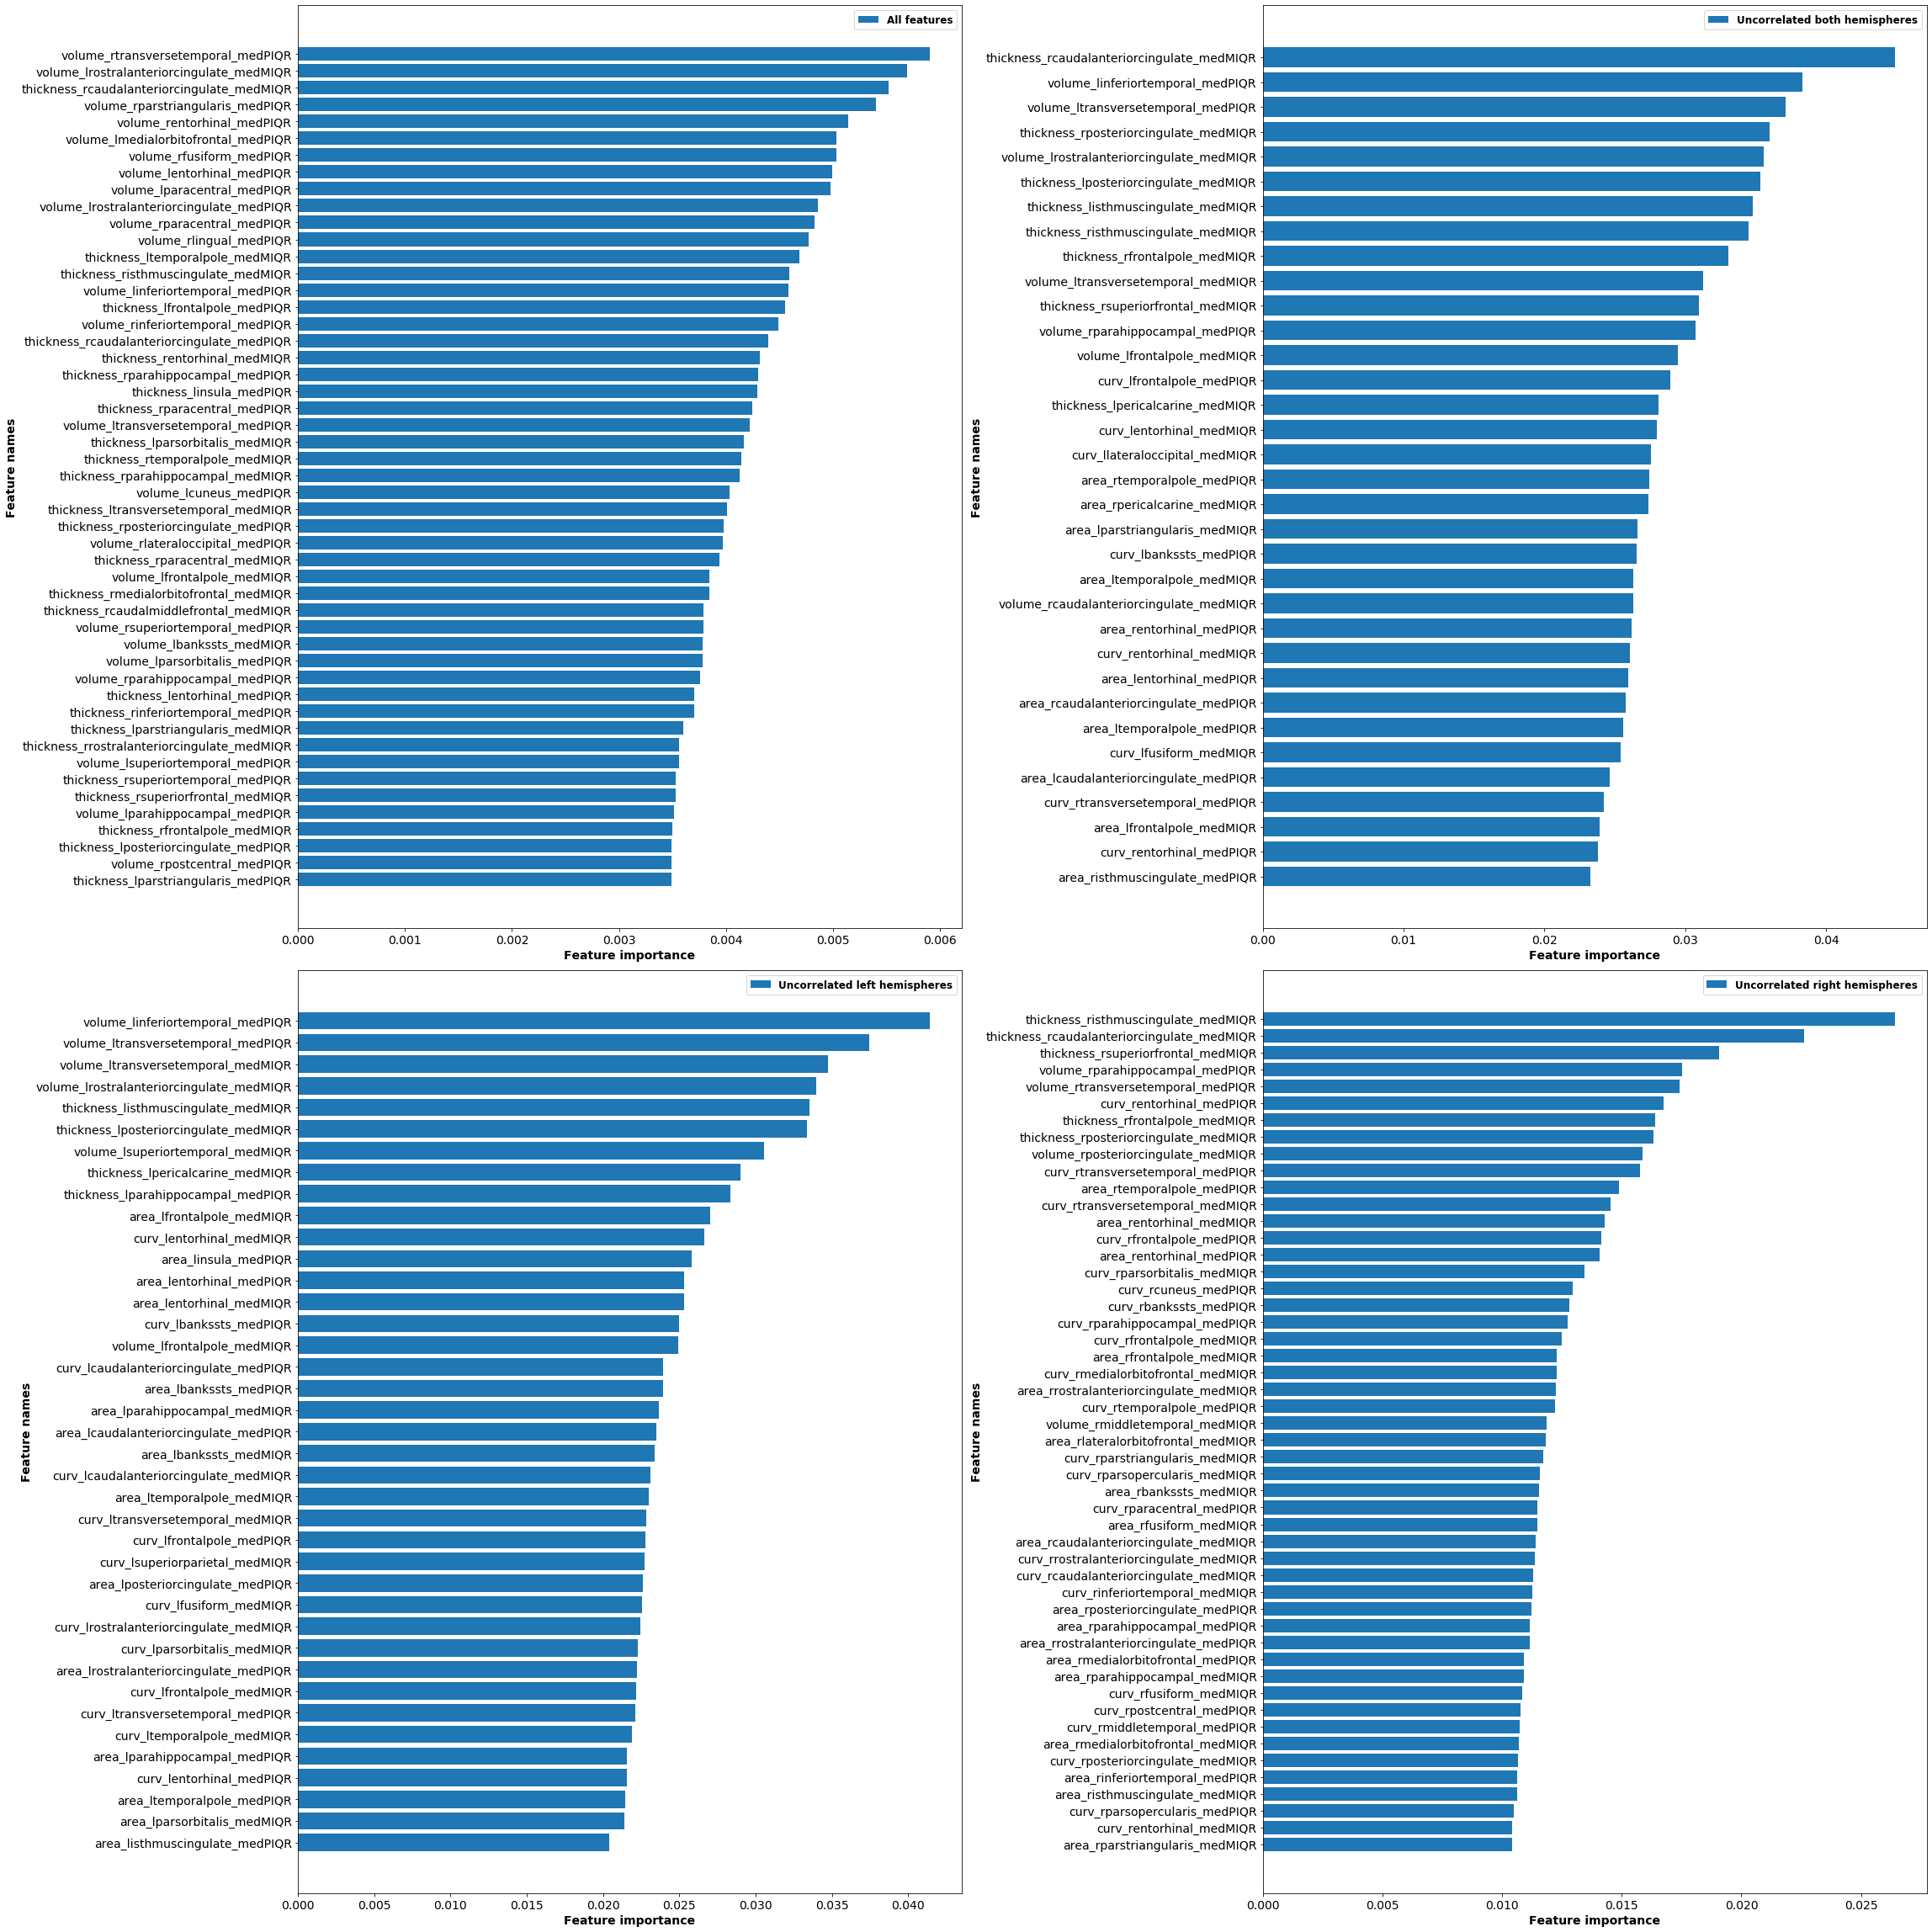

In [6]:
fig = plt.figure(2, figsize=(32, 32))

# All data
selected_feats_sorted_by_importance, feats_importance = get_feature_names_by_importance(dftrain, rfetrain_rf)
plt.subplot(2,2,1)
plt.barh(y=selected_feats_sorted_by_importance[-50:], width=feats_importance[-50:], label='All features')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Feature importance', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Feature names', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})

# Correlation analysis both hemispheres
selected_feats_sorted_by_importance, feats_importance = get_feature_names_by_importance(dftrain_corr, rfetrain_corr_rf)
plt.subplot(2,2,2)
plt.barh(y=selected_feats_sorted_by_importance[-50:], width=feats_importance[-50:], label='Uncorrelated both hemispheres')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Feature importance', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Feature names', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})


# Correlation analysis left hemisphere
selected_feats_sorted_by_importance, feats_importance = get_feature_names_by_importance(dftrain_corr_l, rfetrain_corr_l_rf)
plt.subplot(2,2,3)
plt.barh(y=selected_feats_sorted_by_importance[-50:], width=feats_importance[-50:], label='Uncorrelated left hemispheres')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Feature importance', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Feature names', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})


# Correlation analysis right hemisphere
selected_feats_sorted_by_importance, feats_importance = get_feature_names_by_importance(dftrain_corr_r, rfetrain_corr_r_rf)
plt.subplot(2,2,4)
plt.barh(y=selected_feats_sorted_by_importance[-50:], width=feats_importance[-50:], label='Uncorrelated right hemispheres')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Feature importance', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Feature names', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})

plt.tight_layout()
plt.show()

In [12]:
rfetrain_svm = load('./Final_Results/FS/Normalize_allMorphFeats/rfetrain_svm.joblib')
rfetrain_corr_svm = load('./Final_Results/FS/Normalize_allMorphFeats/rfetrain_corr_svm.joblib')
rfetrain_corr_l_svm = load('./Final_Results/FS/Normalize_allMorphFeats/rfetrain_corr_l_svm.joblib')
rfetrain_corr_r_svm = load('./Final_Results/FS/Normalize_allMorphFeats/rfetrain_corr_r_svm.joblib')

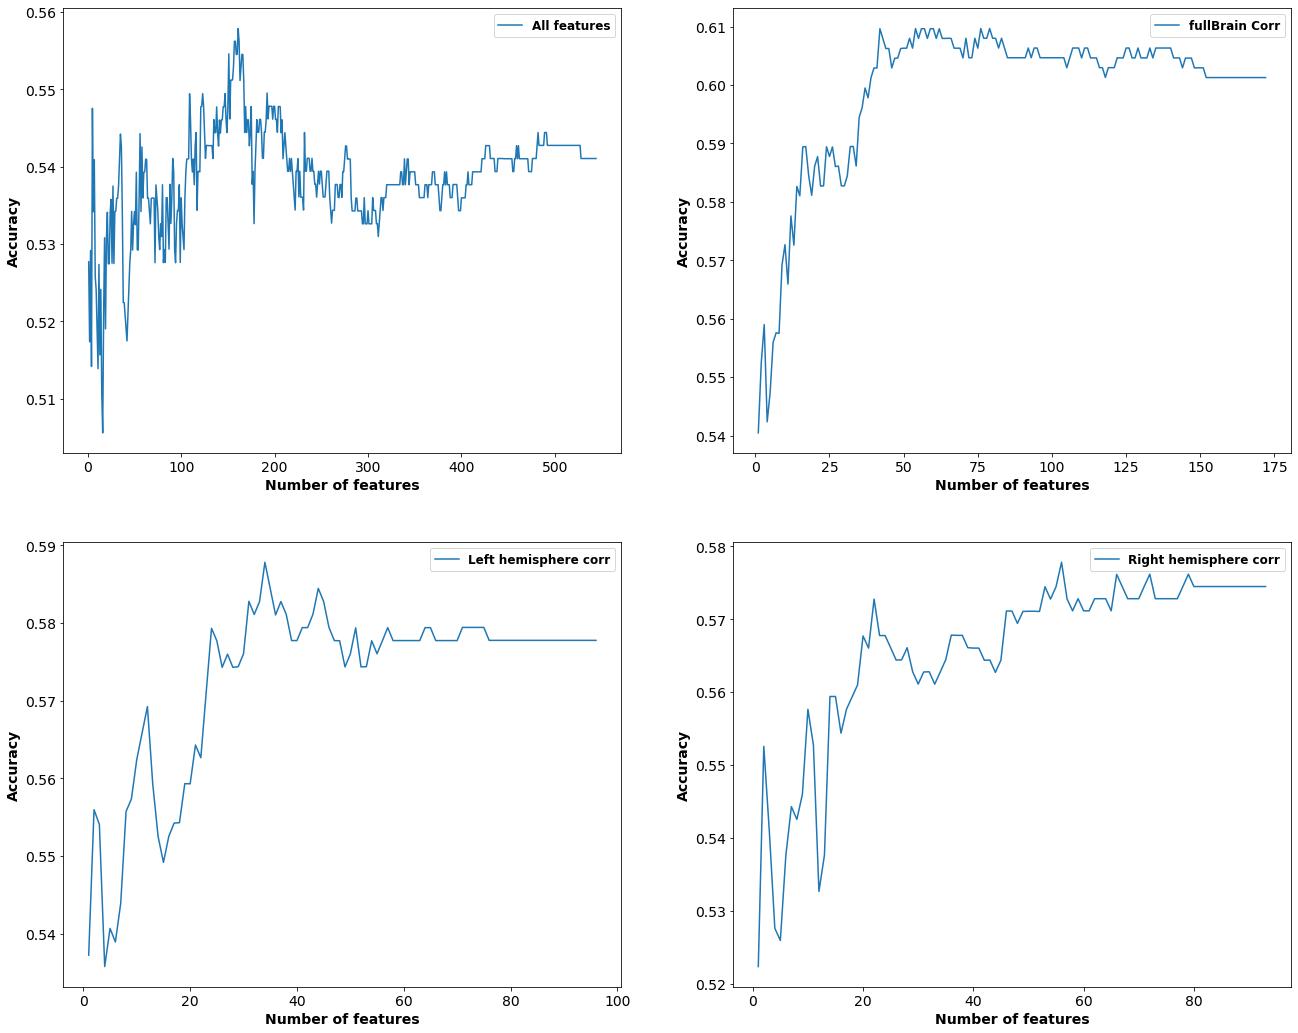

In [13]:
f1 = plt.figure(3, figsize=(22,18))
plt.subplot(2,2,1)
plt.plot(range(1,len(rfetrain_svm.grid_scores_)+1), rfetrain_svm.grid_scores_, label='All features')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of features', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Accuracy', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})


plt.subplot(2,2,2)
plt.plot(range(1,len(rfetrain_corr_svm.grid_scores_)+1), rfetrain_corr_svm.grid_scores_, label='fullBrain Corr')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of features', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Accuracy', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})

plt.subplot(2,2,3)
plt.plot(range(1,len(rfetrain_corr_l_svm.grid_scores_)+1), rfetrain_corr_l_svm.grid_scores_, label='Left hemisphere corr')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of features', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Accuracy', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})

plt.subplot(2,2,4)
plt.plot(range(1,len(rfetrain_corr_r_svm.grid_scores_)+1), rfetrain_corr_r_svm.grid_scores_, label='Right hemisphere corr')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of features', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Accuracy', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})
plt.show()

In [6]:
def get_feature_names_by_coef(df, rfeobj):
    selected_cols_names = df.columns[np.where(rfeobj.support_)]
    selected_feats_sorted_by_importance = selected_cols_names[np.argsort(np.abs(rfeobj.estimator_.coef_))]
    return selected_feats_sorted_by_importance[0], rfeobj.estimator_.coef_[0][np.argsort(np.abs(rfeobj.estimator_.coef_))][0]

C:\Users\bioen\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


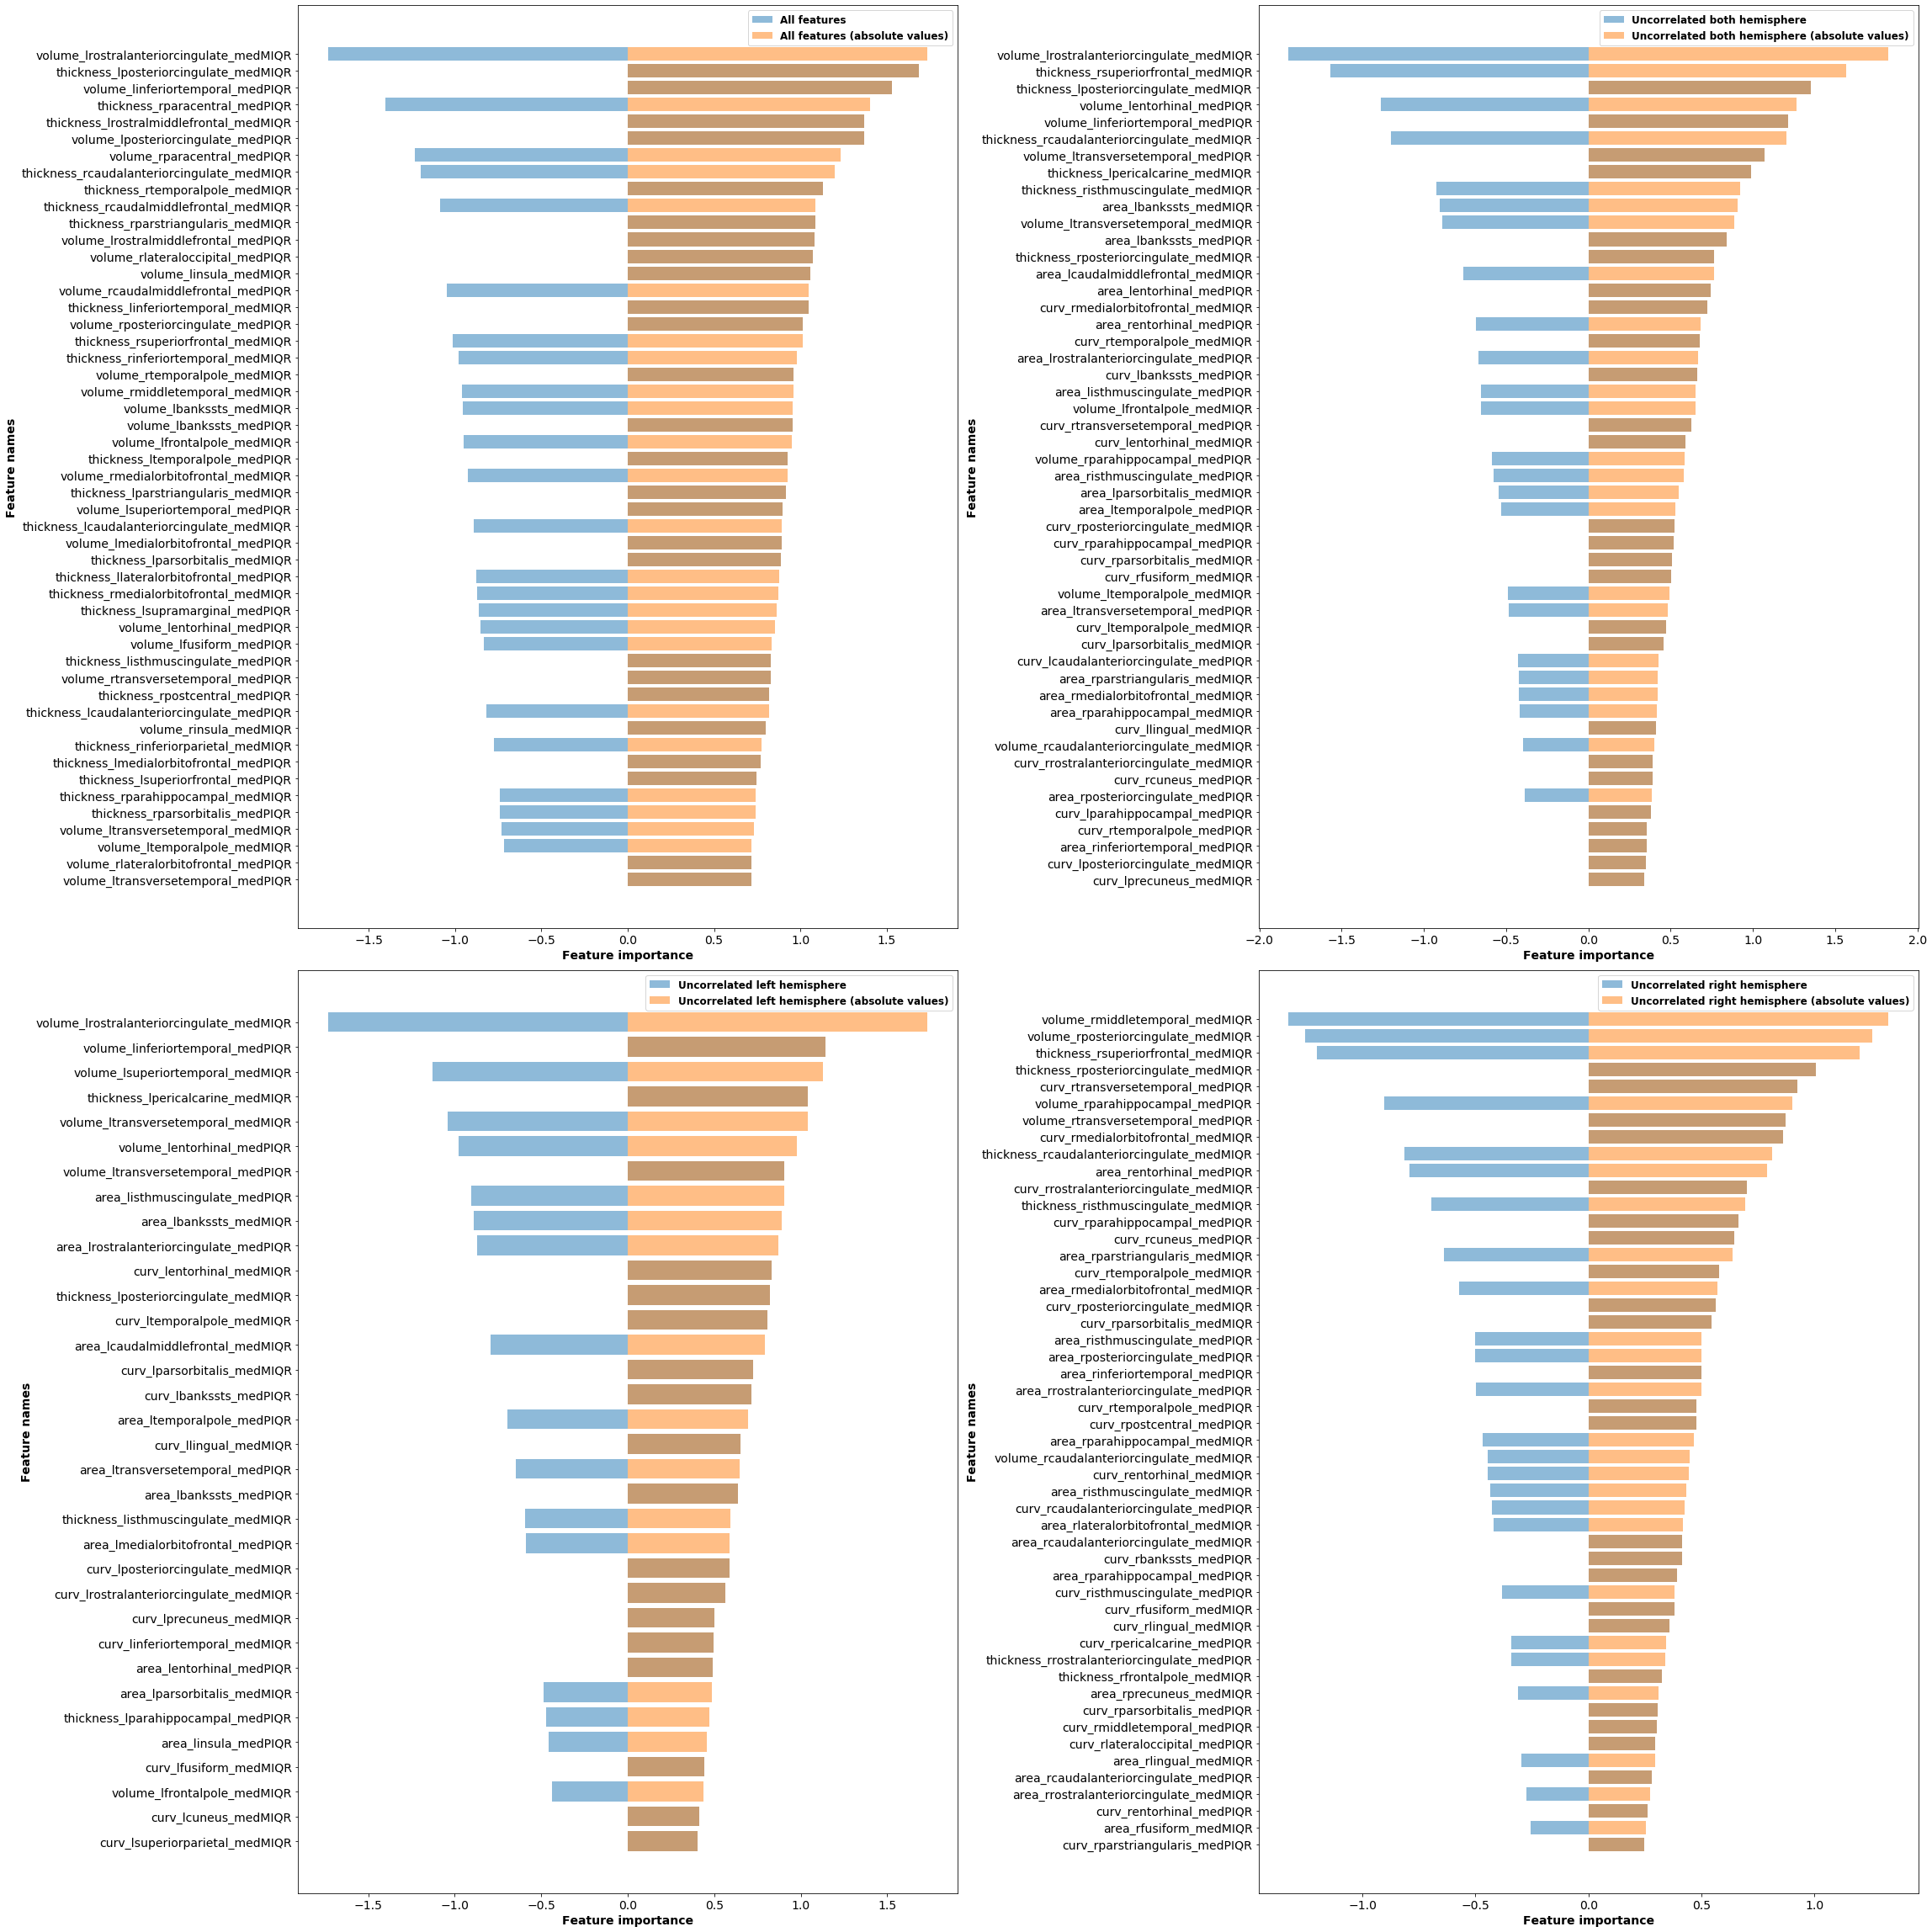

In [15]:
fig = plt.figure(4, figsize=(32, 32))

# All data
selected_feats_sorted_by_importance, feats_importance = get_feature_names_by_coef(dftrain, rfetrain_svm)
plt.subplot(2,2,1)
if len(feats_importance)>50:
    plt.barh(y=selected_feats_sorted_by_importance[-50:], width=feats_importance[-50:],alpha=0.5, label='All features')
    plt.barh(y=selected_feats_sorted_by_importance[-50:], width=np.abs(feats_importance[-50:]), alpha=0.5, label='All features (absolute values)')

else:
    plt.barh(y=selected_feats_sorted_by_importance, width=feats_importance, alpha=0.5, label='All features')
    plt.barh(y=selected_feats_sorted_by_importance, width=np.abs(feats_importance), alpha=0.5, label='All features (absolute values)')

    
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Feature importance', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Feature names', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})

# Correlation analysis both hemispheres
selected_feats_sorted_by_importance, feats_importance = get_feature_names_by_coef(dftrain_corr, rfetrain_corr_svm)
plt.subplot(2,2,2)
if len(feats_importance)>50:
    plt.barh(y=selected_feats_sorted_by_importance[-50:], width=feats_importance[-50:],alpha=0.5, label='Uncorrelated both hemisphere')
    plt.barh(y=selected_feats_sorted_by_importance[-50:], width=np.abs(feats_importance[-50:]), alpha=0.5, label='Uncorrelated both hemisphere (absolute values)')
else:
    plt.barh(y=selected_feats_sorted_by_importance, width=feats_importance, label='Uncorrelated both hemisphere')
    plt.barh(y=selected_feats_sorted_by_importance, width=np.abs(feats_importance), alpha=0.5, label='Uncorrelated both hemisphere (absolute values)')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Feature importance', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Feature names', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})


# Correlation analysis left hemisphere
selected_feats_sorted_by_importance, feats_importance = get_feature_names_by_coef(dftrain_corr_l, rfetrain_corr_l_svm)
plt.subplot(2,2,3)
if len(feats_importance)>50:
    plt.barh(y=selected_feats_sorted_by_importance[-50:], width=feats_importance[-50:],alpha=0.5, label='Uncorrelated left hemisphere')
    plt.barh(y=selected_feats_sorted_by_importance[-50:], width=np.abs(feats_importance[-50:]), alpha=0.5, label='Uncorrelated left hemisphere (absolute values)')
else:
    plt.barh(y=selected_feats_sorted_by_importance, width=feats_importance,alpha=0.5, label='Uncorrelated left hemisphere')
    plt.barh(y=selected_feats_sorted_by_importance, width=np.abs(feats_importance), alpha=0.5, label='Uncorrelated left hemisphere (absolute values)')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Feature importance', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Feature names', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})


# Correlation analysis right hemisphere
selected_feats_sorted_by_importance, feats_importance = get_feature_names_by_coef(dftrain_corr_r, rfetrain_corr_r_svm)
plt.subplot(2,2,4)
if len(feats_importance)>50:
    plt.barh(y=selected_feats_sorted_by_importance[-50:],width=feats_importance[-50:],alpha=0.5, label='Uncorrelated right hemisphere')
    plt.barh(y=selected_feats_sorted_by_importance[-50:], width=np.abs(feats_importance[-50:]), alpha=0.5, label='Uncorrelated right hemisphere (absolute values)')
else:
    plt.barh(y=selected_feats_sorted_by_importance, width=feats_importance, label='Uncorrelated right hemisphere')
    plt.barh(y=selected_feats_sorted_by_importance,width=np.abs(feats_importance), alpha=0.5, label='Uncorrelated right hemisphere (absolute values)')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Feature importance', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Feature names', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})

plt.tight_layout()
plt.show()

In [4]:
rfetrain_lg1 = load('./Final_Results/FS/Normalize_allMorphFeats/rfetrain_lg1.joblib')
rfetrain_corr_lg1 = load('./Final_Results/FS/Normalize_allMorphFeats/rfetrain_corr_lg1.joblib')
rfetrain_corr_l_lg1 = load('./Final_Results/FS/Normalize_allMorphFeats/rfetrain_corr_l_lg1.joblib')
rfetrain_corr_r_lg1 = load('./Final_Results/FS/Normalize_allMorphFeats/rfetrain_corr_r_lg1.joblib')

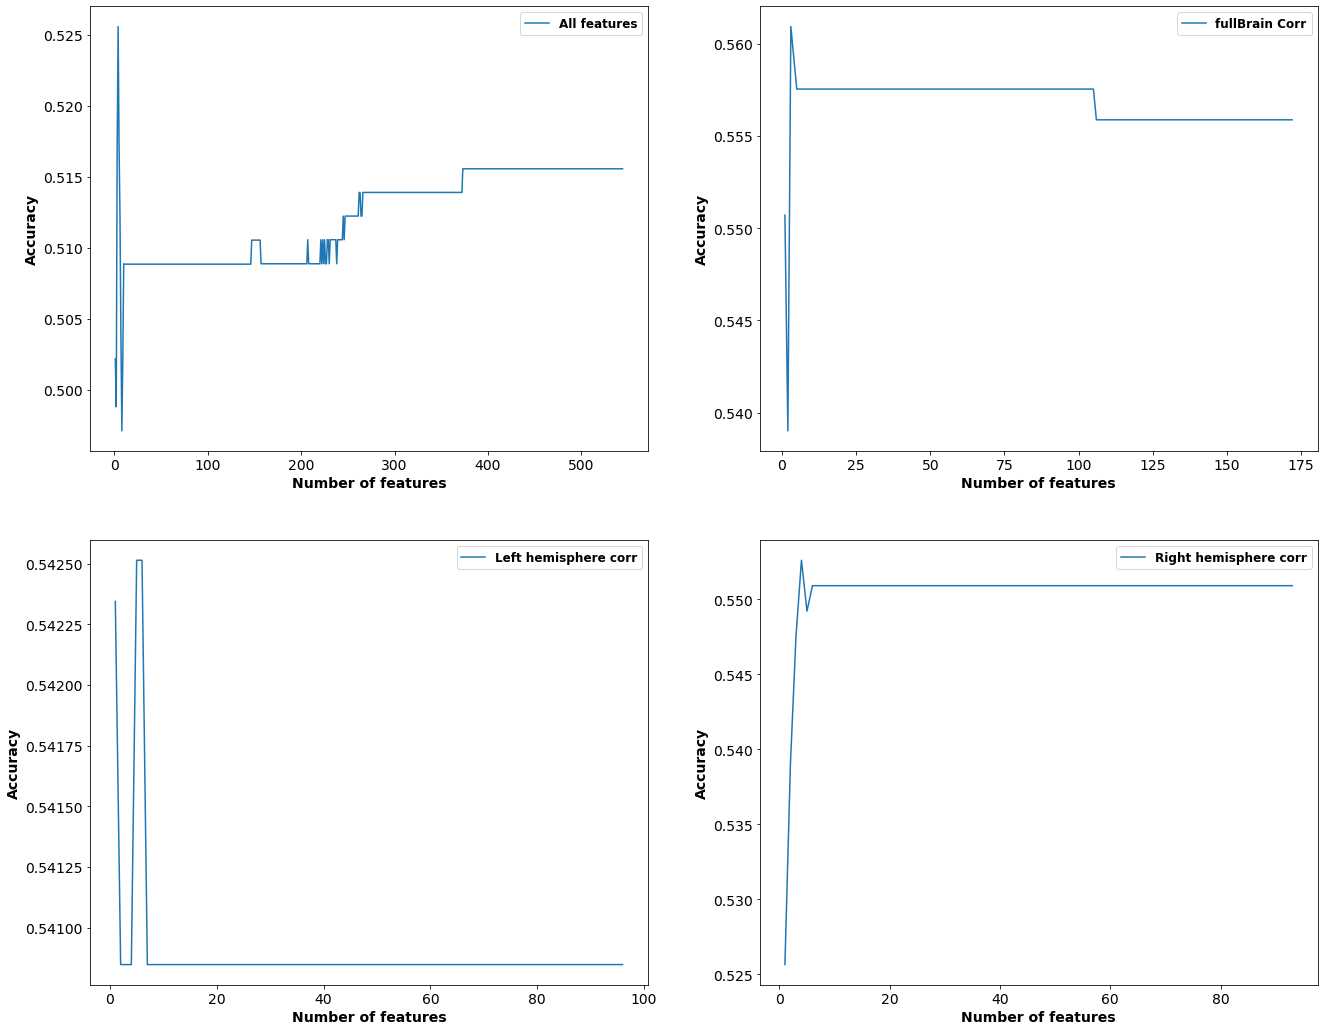

In [5]:
f1 = plt.figure(3, figsize=(22,18))
plt.subplot(2,2,1)
plt.plot(range(1,len(rfetrain_lg1.grid_scores_)+1), rfetrain_lg1.grid_scores_, label='All features')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of features', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Accuracy', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})


plt.subplot(2,2,2)
plt.plot(range(1,len(rfetrain_corr_lg1.grid_scores_)+1), rfetrain_corr_lg1.grid_scores_, label='fullBrain Corr')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of features', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Accuracy', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})

plt.subplot(2,2,3)
plt.plot(range(1,len(rfetrain_corr_l_lg1.grid_scores_)+1), rfetrain_corr_l_lg1.grid_scores_, label='Left hemisphere corr')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of features', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Accuracy', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})

plt.subplot(2,2,4)
plt.plot(range(1,len(rfetrain_corr_r_lg1.grid_scores_)+1), rfetrain_corr_r_lg1.grid_scores_, label='Right hemisphere corr')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of features', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Accuracy', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})
plt.show()

C:\Users\bioen\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


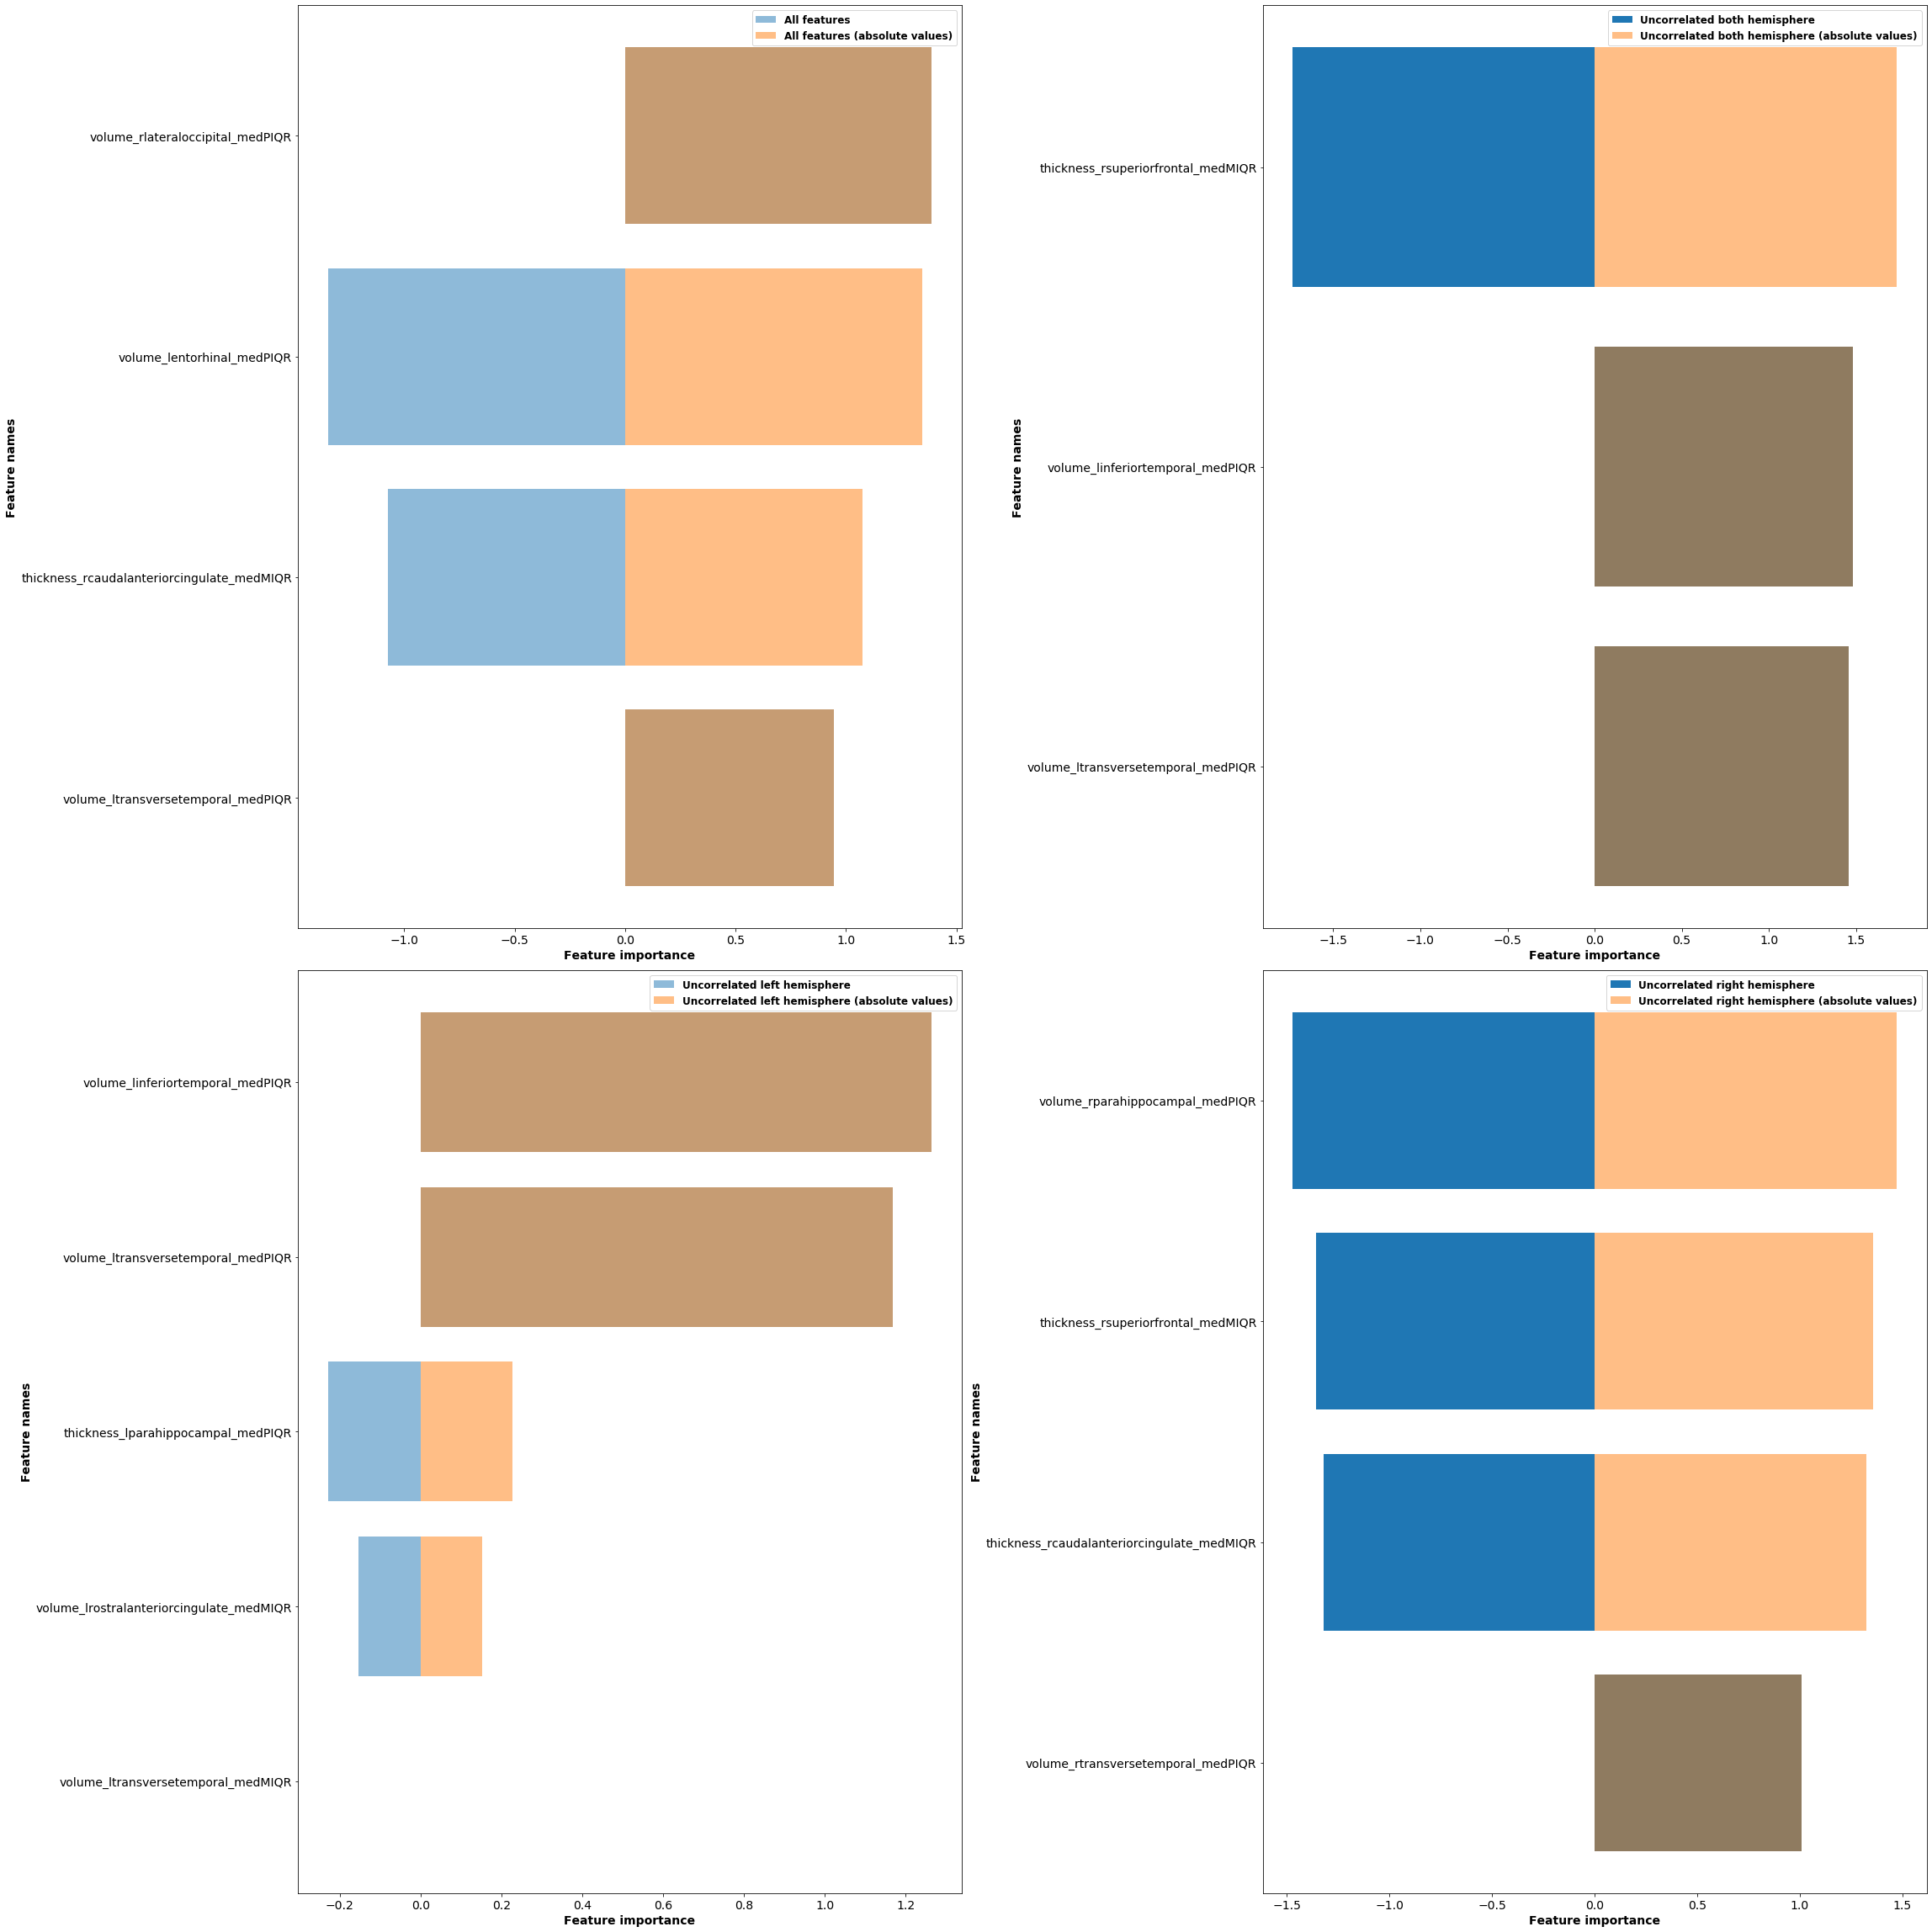

In [7]:
fig = plt.figure(4, figsize=(32, 32))

# All data
selected_feats_sorted_by_importance, feats_importance = get_feature_names_by_coef(dftrain, rfetrain_lg1)
plt.subplot(2,2,1)
if len(feats_importance)>50:
    plt.barh(y=selected_feats_sorted_by_importance[-50:], width=feats_importance[-50:],alpha=0.5, label='All features')
    plt.barh(y=selected_feats_sorted_by_importance[-50:], width=np.abs(feats_importance[-50:]), alpha=0.5, label='All features (absolute values)')

else:
    plt.barh(y=selected_feats_sorted_by_importance, width=feats_importance, alpha=0.5, label='All features')
    plt.barh(y=selected_feats_sorted_by_importance, width=np.abs(feats_importance), alpha=0.5, label='All features (absolute values)')

    
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Feature importance', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Feature names', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})

# Correlation analysis both hemispheres
selected_feats_sorted_by_importance, feats_importance = get_feature_names_by_coef(dftrain_corr, rfetrain_corr_lg1)
plt.subplot(2,2,2)
if len(feats_importance)>50:
    plt.barh(y=selected_feats_sorted_by_importance[-50:], width=feats_importance[-50:],alpha=0.5, label='Uncorrelated both hemisphere')
    plt.barh(y=selected_feats_sorted_by_importance[-50:], width=np.abs(feats_importance[-50:]), alpha=0.5, label='Uncorrelated both hemisphere (absolute values)')
else:
    plt.barh(y=selected_feats_sorted_by_importance, width=feats_importance, label='Uncorrelated both hemisphere')
    plt.barh(y=selected_feats_sorted_by_importance, width=np.abs(feats_importance), alpha=0.5, label='Uncorrelated both hemisphere (absolute values)')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Feature importance', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Feature names', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})


# Correlation analysis left hemisphere
selected_feats_sorted_by_importance, feats_importance = get_feature_names_by_coef(dftrain_corr_l, rfetrain_corr_l_lg1)
plt.subplot(2,2,3)
if len(feats_importance)>50:
    plt.barh(y=selected_feats_sorted_by_importance[-50:], width=feats_importance[-50:],alpha=0.5, label='Uncorrelated left hemisphere')
    plt.barh(y=selected_feats_sorted_by_importance[-50:], width=np.abs(feats_importance[-50:]), alpha=0.5, label='Uncorrelated left hemisphere (absolute values)')
else:
    plt.barh(y=selected_feats_sorted_by_importance, width=feats_importance,alpha=0.5, label='Uncorrelated left hemisphere')
    plt.barh(y=selected_feats_sorted_by_importance, width=np.abs(feats_importance), alpha=0.5, label='Uncorrelated left hemisphere (absolute values)')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Feature importance', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Feature names', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})


# Correlation analysis right hemisphere
selected_feats_sorted_by_importance, feats_importance = get_feature_names_by_coef(dftrain_corr_r, rfetrain_corr_r_lg1)
plt.subplot(2,2,4)
if len(feats_importance)>50:
    plt.barh(y=selected_feats_sorted_by_importance[-50:],width=feats_importance[-50:],alpha=0.5, label='Uncorrelated right hemisphere')
    plt.barh(y=selected_feats_sorted_by_importance[-50:], width=np.abs(feats_importance[-50:]), alpha=0.5, label='Uncorrelated right hemisphere (absolute values)')
else:
    plt.barh(y=selected_feats_sorted_by_importance, width=feats_importance, label='Uncorrelated right hemisphere')
    plt.barh(y=selected_feats_sorted_by_importance,width=np.abs(feats_importance), alpha=0.5, label='Uncorrelated right hemisphere (absolute values)')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Feature importance', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Feature names', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})

plt.tight_layout()
plt.show()

In [9]:
rfetrain_lg2 = load('./Final_Results/FS/Normalize_allMorphFeats/rfetrain_lg2.joblib')
rfetrain_corr_lg2 = load('./Final_Results/FS/Normalize_allMorphFeats/rfetrain_corr_lg2.joblib')
rfetrain_corr_l_lg2 = load('./Final_Results/FS/Normalize_allMorphFeats/rfetrain_corr_l_lg2.joblib')
rfetrain_corr_r_lg2 = load('./Final_Results/FS/Normalize_allMorphFeats/rfetrain_corr_r_lg2.joblib')

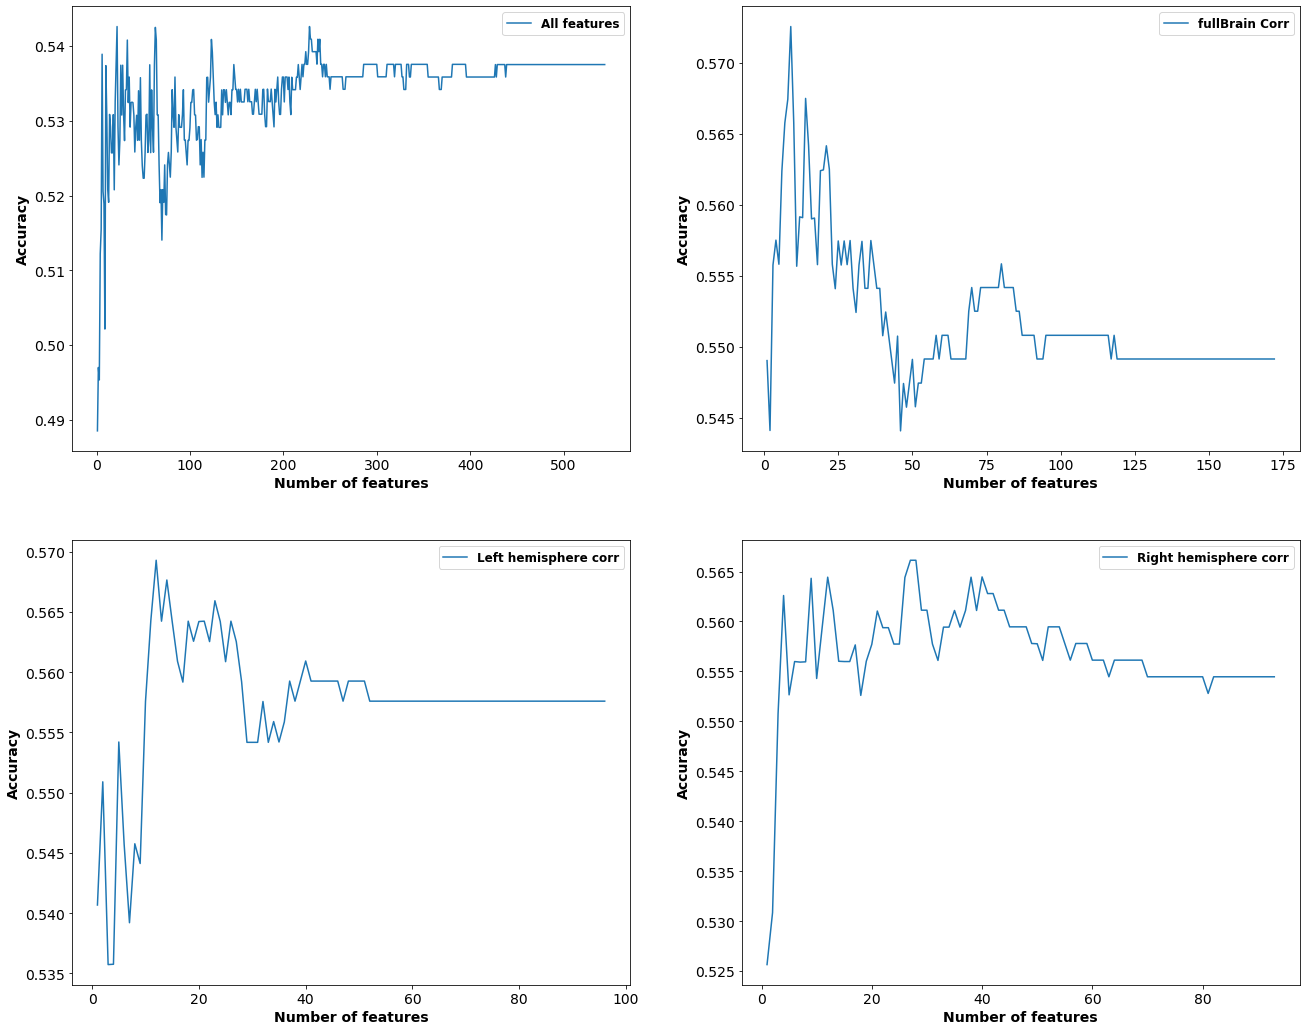

In [10]:
f1 = plt.figure(3, figsize=(22,18))
plt.subplot(2,2,1)
plt.plot(range(1,len(rfetrain_lg2.grid_scores_)+1), rfetrain_lg2.grid_scores_, label='All features')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of features', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Accuracy', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})


plt.subplot(2,2,2)
plt.plot(range(1,len(rfetrain_corr_lg2.grid_scores_)+1), rfetrain_corr_lg2.grid_scores_, label='fullBrain Corr')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of features', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Accuracy', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})

plt.subplot(2,2,3)
plt.plot(range(1,len(rfetrain_corr_l_lg2.grid_scores_)+1), rfetrain_corr_l_lg2.grid_scores_, label='Left hemisphere corr')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of features', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Accuracy', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})

plt.subplot(2,2,4)
plt.plot(range(1,len(rfetrain_corr_r_lg2.grid_scores_)+1), rfetrain_corr_r_lg2.grid_scores_, label='Right hemisphere corr')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of features', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Accuracy', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})
plt.show()

C:\Users\bioen\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


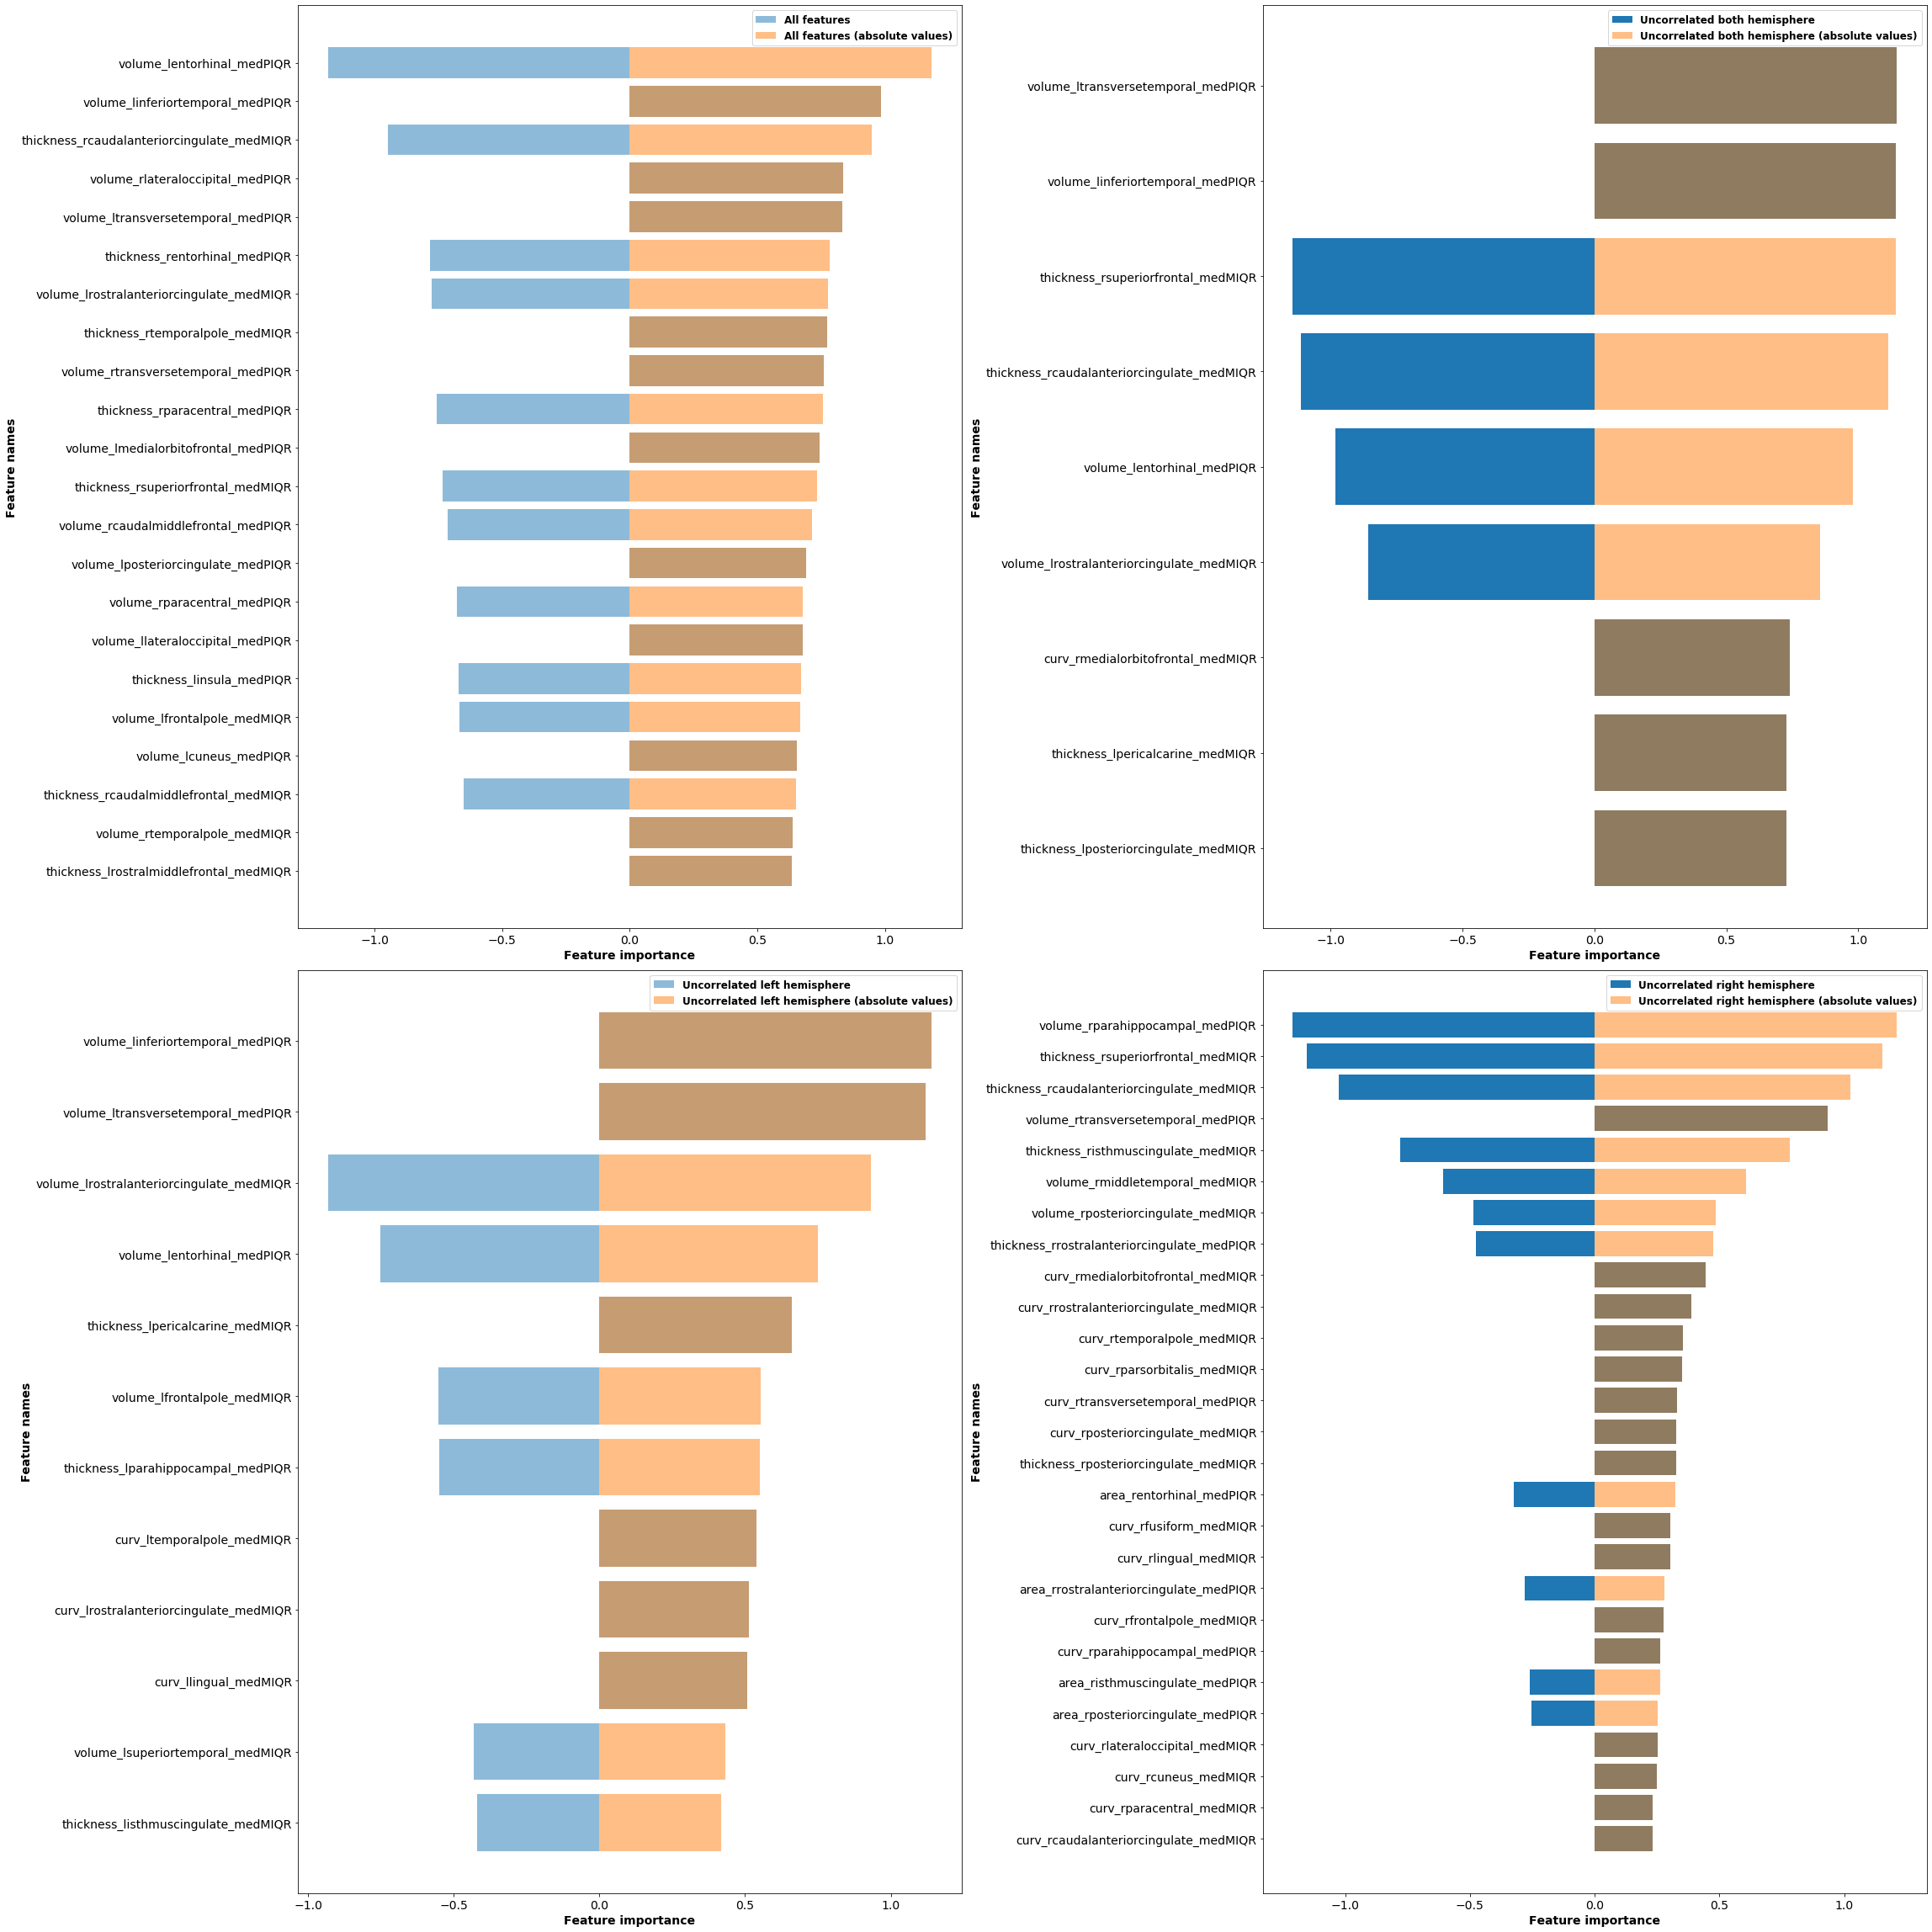

In [11]:
fig = plt.figure(4, figsize=(32, 32))

# All data
selected_feats_sorted_by_importance, feats_importance = get_feature_names_by_coef(dftrain, rfetrain_lg2)
plt.subplot(2,2,1)
if len(feats_importance)>50:
    plt.barh(y=selected_feats_sorted_by_importance[-50:], width=feats_importance[-50:],alpha=0.5, label='All features')
    plt.barh(y=selected_feats_sorted_by_importance[-50:], width=np.abs(feats_importance[-50:]), alpha=0.5, label='All features (absolute values)')

else:
    plt.barh(y=selected_feats_sorted_by_importance, width=feats_importance, alpha=0.5, label='All features')
    plt.barh(y=selected_feats_sorted_by_importance, width=np.abs(feats_importance), alpha=0.5, label='All features (absolute values)')

    
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Feature importance', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Feature names', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})

# Correlation analysis both hemispheres
selected_feats_sorted_by_importance, feats_importance = get_feature_names_by_coef(dftrain_corr, rfetrain_corr_lg2)
plt.subplot(2,2,2)
if len(feats_importance)>50:
    plt.barh(y=selected_feats_sorted_by_importance[-50:], width=feats_importance[-50:],alpha=0.5, label='Uncorrelated both hemisphere')
    plt.barh(y=selected_feats_sorted_by_importance[-50:], width=np.abs(feats_importance[-50:]), alpha=0.5, label='Uncorrelated both hemisphere (absolute values)')
else:
    plt.barh(y=selected_feats_sorted_by_importance, width=feats_importance, label='Uncorrelated both hemisphere')
    plt.barh(y=selected_feats_sorted_by_importance, width=np.abs(feats_importance), alpha=0.5, label='Uncorrelated both hemisphere (absolute values)')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Feature importance', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Feature names', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})


# Correlation analysis left hemisphere
selected_feats_sorted_by_importance, feats_importance = get_feature_names_by_coef(dftrain_corr_l, rfetrain_corr_l_lg2)
plt.subplot(2,2,3)
if len(feats_importance)>50:
    plt.barh(y=selected_feats_sorted_by_importance[-50:], width=feats_importance[-50:],alpha=0.5, label='Uncorrelated left hemisphere')
    plt.barh(y=selected_feats_sorted_by_importance[-50:], width=np.abs(feats_importance[-50:]), alpha=0.5, label='Uncorrelated left hemisphere (absolute values)')
else:
    plt.barh(y=selected_feats_sorted_by_importance, width=feats_importance,alpha=0.5, label='Uncorrelated left hemisphere')
    plt.barh(y=selected_feats_sorted_by_importance, width=np.abs(feats_importance), alpha=0.5, label='Uncorrelated left hemisphere (absolute values)')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Feature importance', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Feature names', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})


# Correlation analysis right hemisphere
selected_feats_sorted_by_importance, feats_importance = get_feature_names_by_coef(dftrain_corr_r, rfetrain_corr_r_lg2)
plt.subplot(2,2,4)
if len(feats_importance)>50:
    plt.barh(y=selected_feats_sorted_by_importance[-50:],width=feats_importance[-50:],alpha=0.5, label='Uncorrelated right hemisphere')
    plt.barh(y=selected_feats_sorted_by_importance[-50:], width=np.abs(feats_importance[-50:]), alpha=0.5, label='Uncorrelated right hemisphere (absolute values)')
else:
    plt.barh(y=selected_feats_sorted_by_importance, width=feats_importance, label='Uncorrelated right hemisphere')
    plt.barh(y=selected_feats_sorted_by_importance,width=np.abs(feats_importance), alpha=0.5, label='Uncorrelated right hemisphere (absolute values)')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Feature importance', fontdict={'size':14, 'weight': 'bold'})
plt.ylabel('Feature names', fontdict={'size':14, 'weight': 'bold'})
plt.legend(prop={'size':12, 'weight':'bold'})

plt.tight_layout()
plt.show()

## See common selected features

### RF


In [10]:
np.argsort(rfetrain_rf.grid_scores_), rfetrain_rf.grid_scores_[513], rfetrain_rf.grid_scores_[20]
np.argsort(rfetrain_corr_rf.grid_scores_), rfetrain_corr_rf.grid_scores_[138], rfetrain_corr_rf.grid_scores_[72]
np.argsort(rfetrain_corr_l_rf.grid_scores_), rfetrain_corr_l_rf.grid_scores_[69]
np.argsort(rfetrain_corr_r_rf.grid_scores_), rfetrain_corr_r_rf.grid_scores_[88]

(array([ 9, 13, 18, 10, 12, 15, 23, 19, 11, 14, 26, 24, 31, 17, 21, 20,  8,
        30, 54, 28, 22, 27, 16,  6, 80,  7,  5,  2, 42, 29, 33, 34,  1, 71,
        91, 37, 70, 67, 52, 47, 65, 82, 61, 40, 89,  4, 38, 49, 36, 46, 68,
        87, 43, 63, 77, 66, 56, 76, 59,  0, 44, 74, 45, 48, 58, 73, 41, 78,
        39, 72, 75, 64, 51, 32, 35, 62, 57, 60, 83, 92, 84, 79,  3, 90, 85,
        25, 50, 53, 55, 86, 69, 81, 88], dtype=int64),
 0.5507344632768362)

In [8]:
dftrain.columns[np.where(rfetrain_rf.ranking_==1)[0]][:21]

Index(['area_lbankssts_medMIQR', 'area_lbankssts_medPIQR',
       'area_lcaudalanteriorcingulate_medMIQR',
       'area_lcaudalanteriorcingulate_medPIQR',
       'area_lcaudalmiddlefrontal_medMIQR',
       'area_lcaudalmiddlefrontal_medPIQR', 'area_lcuneus_medMIQR',
       'area_lcuneus_medPIQR', 'area_lentorhinal_medMIQR',
       'area_lentorhinal_medPIQR', 'area_lfusiform_medMIQR',
       'area_lfusiform_medPIQR', 'area_linferiorparietal_medPIQR',
       'area_linferiortemporal_medMIQR', 'area_linferiortemporal_medPIQR',
       'area_listhmuscingulate_medMIQR', 'area_listhmuscingulate_medPIQR',
       'area_llateralorbitofrontal_medMIQR',
       'area_llateralorbitofrontal_medPIQR', 'area_llingual_medMIQR',
       'area_llingual_medPIQR'],
      dtype='object')

In [9]:
dftrain_corr.columns[np.where(rfetrain_corr_rf.ranking_==1)][:73]

Index(['area_lbankssts_medMIQR', 'area_lbankssts_medPIQR',
       'area_lcaudalanteriorcingulate_medMIQR',
       'area_lcaudalanteriorcingulate_medPIQR',
       'area_lcaudalmiddlefrontal_medMIQR', 'area_lentorhinal_medPIQR',
       'area_lfusiform_medMIQR', 'area_linferiortemporal_medMIQR',
       'area_listhmuscingulate_medMIQR', 'area_listhmuscingulate_medPIQR',
       'area_llateralorbitofrontal_medMIQR',
       'area_lmedialorbitofrontal_medMIQR',
       'area_lmedialorbitofrontal_medPIQR', 'area_lmiddletemporal_medMIQR',
       'area_lparahippocampal_medMIQR', 'area_lparahippocampal_medPIQR',
       'area_lparsopercularis_medMIQR', 'area_lparsorbitalis_medMIQR',
       'area_lparstriangularis_medMIQR', 'area_lposteriorcingulate_medMIQR',
       'area_lposteriorcingulate_medPIQR',
       'area_lrostralanteriorcingulate_medMIQR',
       'area_lrostralanteriorcingulate_medPIQR',
       'area_lrostralmiddlefrontal_medMIQR',
       'area_ltransversetemporal_medPIQR', 'area_rbankssts_

In [10]:
dftrain_corr_l.columns[np.where(rfetrain_corr_l_rf.ranking_==1)][:70]

Index(['area_lbankssts_medMIQR', 'area_lbankssts_medPIQR',
       'area_lcaudalanteriorcingulate_medMIQR',
       'area_lcaudalanteriorcingulate_medPIQR',
       'area_lcaudalmiddlefrontal_medMIQR', 'area_lentorhinal_medPIQR',
       'area_lfusiform_medMIQR', 'area_linferiortemporal_medMIQR',
       'area_linferiortemporal_medPIQR', 'area_listhmuscingulate_medMIQR',
       'area_listhmuscingulate_medPIQR', 'area_llateralorbitofrontal_medMIQR',
       'area_lmedialorbitofrontal_medMIQR',
       'area_lmedialorbitofrontal_medPIQR', 'area_lmiddletemporal_medMIQR',
       'area_lparahippocampal_medMIQR', 'area_lparahippocampal_medPIQR',
       'area_lparsopercularis_medMIQR', 'area_lparsorbitalis_medMIQR',
       'area_lparstriangularis_medMIQR', 'area_lposteriorcingulate_medMIQR',
       'area_lposteriorcingulate_medPIQR',
       'area_lrostralanteriorcingulate_medMIQR',
       'area_lrostralanteriorcingulate_medPIQR',
       'area_lrostralmiddlefrontal_medMIQR', 'area_ltemporalpole_medMI

In [11]:
dftrain_corr_r.columns[np.where(rfetrain_corr_r_rf.ranking_==1)][:89]

Index(['area_rbankssts_medMIQR', 'area_rcaudalanteriorcingulate_medMIQR',
       'area_rcaudalanteriorcingulate_medPIQR', 'area_rentorhinal_medMIQR',
       'area_rentorhinal_medPIQR', 'area_rfusiform_medMIQR',
       'area_rinferiortemporal_medMIQR', 'area_rinferiortemporal_medPIQR',
       'area_risthmuscingulate_medMIQR', 'area_risthmuscingulate_medPIQR',
       'area_rlateralorbitofrontal_medMIQR', 'area_rlingual_medMIQR',
       'area_rmedialorbitofrontal_medMIQR',
       'area_rmedialorbitofrontal_medPIQR', 'area_rparahippocampal_medMIQR',
       'area_rparahippocampal_medPIQR', 'area_rparsopercularis_medMIQR',
       'area_rparsorbitalis_medMIQR', 'area_rparstriangularis_medMIQR',
       'area_rpericalcarine_medMIQR', 'area_rposteriorcingulate_medMIQR',
       'area_rposteriorcingulate_medPIQR', 'area_rprecuneus_medMIQR',
       'area_rrostralanteriorcingulate_medMIQR',
       'area_rrostralanteriorcingulate_medPIQR',
       'area_rsuperiortemporal_medMIQR', 'area_rtemporalpole_

### SVM

In [24]:
np.argsort(rfetrain_svm.grid_scores_), rfetrain_svm.grid_scores_[11],  
np.argsort(rfetrain_corr_svm.grid_scores_), rfetrain_corr_rf.grid_scores_[87]
np.argsort(rfetrain_corr_l_svm.grid_scores_), rfetrain_corr_l_svm.grid_scores_[43], rfetrain_corr_l_svm.grid_scores_[59]
np.argsort(rfetrain_corr_r_svm.grid_scores_), rfetrain_corr_r_svm.grid_scores_[76]

(array([12, 13, 11, 16,  0,  4,  3, 17, 10, 21,  5, 15, 14, 24,  6, 18,  1,
        20, 19, 23, 22,  9,  2, 25, 26, 34, 33, 35, 52,  7, 39, 36, 51, 32,
        38, 31, 29, 37, 40, 28, 55, 43, 49, 27, 53, 46, 41, 42, 45, 44, 54,
        58, 65, 60, 66,  8, 50, 67, 57, 59, 68, 69, 70, 30, 64, 61, 56, 63,
        62, 48, 47, 71, 73, 74, 90, 72, 84, 82, 81, 89, 85, 83, 91, 78, 77,
        80, 92, 79, 86, 87, 88, 75, 76], dtype=int64),
 0.5695762711864407)

In [25]:
rfetrain_corr_r_svm.grid_scores_, rfetrain_corr_r_svm.ranking_

(array([0.52353107, 0.53211864, 0.53892655, 0.52562147, 0.52384181,
        0.52720339, 0.53070621, 0.55079096, 0.56242938, 0.5340678 ,
        0.52573446, 0.51887006, 0.50717514, 0.51717514, 0.52898305,
        0.5289548 , 0.5190113 , 0.52564972, 0.53079096, 0.53242938,
        0.53240113, 0.52576271, 0.5340678 , 0.53403955, 0.52912429,
        0.5390678 , 0.54567797, 0.55926554, 0.55768362, 0.5559322 ,
        0.56423729, 0.55576271, 0.55415254, 0.54751412, 0.54581921,
        0.54754237, 0.5509322 , 0.55765537, 0.55432203, 0.5509322 ,
        0.55765537, 0.5609887 , 0.5610452 , 0.55774011, 0.56110169,
        0.56107345, 0.55946328, 0.56454802, 0.56451977, 0.55779661,
        0.56271186, 0.55274011, 0.54940678, 0.55943503, 0.56110169,
        0.55774011, 0.56449153, 0.56282486, 0.56110169, 0.56282486,
        0.56115819, 0.56449153, 0.56451977, 0.56451977, 0.56449153,
        0.56115819, 0.56118644, 0.56282486, 0.56288136, 0.56288136,
        0.5629096 , 0.56454802, 0.56457627, 0.56

In [27]:
(rfetrain_corr_r_svm.ranking_==1).sum()

77